In [1]:
!pip install nltk


In [3]:
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import pandas as pd
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Download necessary NLTK data
nltk.download('opinion_lexicon')
nltk.download('punkt')  # Download correct tokenizer

# Provide the correct file path
file_path = ("bestsellers with categories.csv")  # Update this path

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    # Load dataset
    df = pd.read_csv(file_path)

    


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
# Check if 'Name' column exists
if 'Name' not in df.columns:
    print("Error: 'Name' column not found in dataset.")
else:
    # Display first few rows of the dataset
    print(df.head())



                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [69]:
# Display first few rows of the dataset
print(df.head())

# Load positive & negative word lists from NLTK
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [72]:
# Function to extract sentiment words from book titles
def extract_sentiment_words(title):
    if pd.isna(title):  # Handle NaN values
        return [], []

    words = word_tokenize(str(title).lower())  # Convert title to string before tokenizing
    pos_words = [word for word in words if word in positive_words]
    neg_words = [word for word in words if word in negative_words]
    
    return pos_words, neg_words


In [84]:
import nltk

# Download 'punkt' tokenizer
nltk.download('punkt_tab')  # Ensure the punkt tokenizer is downloaded



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [90]:
# Apply function to book titles
df['Positive_Words'], df['Negative_Words'] = zip(*df['Name'].apply(extract_sentiment_words))

        # Flatten the lists of words and count total positive & negative words
pos_word_count = df['Positive_Words'].explode().value_counts().head(10)
neg_word_count = df['Negative_Words'].explode().value_counts().head(10)

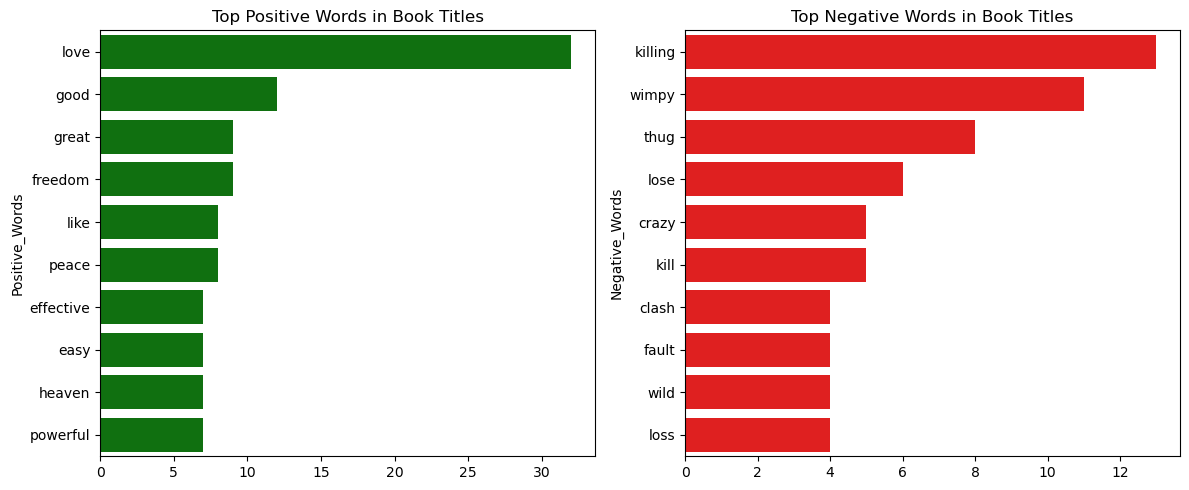

In [92]:
# Plot positive vs negative words
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(y=pos_word_count.index, x=pos_word_count.values, ax=ax[0], color='green')
ax[0].set_title("Top Positive Words in Book Titles")

sns.barplot(y=neg_word_count.index, x=neg_word_count.values, ax=ax[1], color='red')
ax[1].set_title("Top Negative Words in Book Titles")

plt.tight_layout()
plt.show()

In [100]:
# Define sentiment label based on positive and negative word counts
def assign_sentiment(row):
    if len(row['Positive_Words']) > len(row['Negative_Words']):
        return 'Positive'
    elif len(row['Negative_Words']) > len(row['Positive_Words']):
        return 'Negative'
    else:
        return 'Neutral'  # If equal, we can label it neutral

# Assign sentiment labels
df['Predicted_Sentiment'] = df.apply(assign_sentiment, axis=1)


In [102]:
# Assign sentiment labels
df['Predicted_Sentiment'] = df.apply(assign_sentiment, axis=1)

# If you have actual sentiment labels in the dataset, you can compare them with the predicted labels:
# For example, assuming you manually labeled a few rows:
# df['Actual_Sentiment'] = ['Positive', 'Negative', 'Neutral', ...]  # Add actual sentiment labels

if 'Actual_Sentiment' in df.columns:
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(df['Actual_Sentiment'], df['Predicted_Sentiment'])
    print(f"Accuracy: {accuracy * 100:.2f}%")
else:
    print("No actual sentiment labels found. Please add the 'Actual_Sentiment' column to compute accuracy.")


No actual sentiment labels found. Please add the 'Actual_Sentiment' column to compute accuracy.
